# Download Data

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import datetime as dt
import os
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/Users/maris/Documents/FE800')

In [4]:
sns.set_theme()
sns.set_palette("tab20")
sns.set_style("darkgrid", rc = {"grid.color": "white"})
c10 = sns.color_palette("tab10").as_hex()[:]
c20 = sns.color_palette("tab20").as_hex()[:]

In [7]:
pd.set_option('display.max_columns', None)

# ETF/Stock Data

## LQD Prices

In [5]:
hist = yf.download("LQD", "2018-07-01", "2023-07-01")
hist.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,114.410004,114.410004,114.160004,114.239998,96.505859,4806200
2018-07-03,114.309998,114.730003,114.309998,114.660004,96.860672,2518100
2018-07-05,114.769997,115.029999,114.750000,115.019997,97.164749,4730600
2018-07-06,115.239998,115.279999,115.089996,115.180000,97.299911,2465600
2018-07-09,115.089996,115.300003,115.029999,115.260002,97.367508,5161600


In [6]:
hist_SPY = yf.download("SPY", "2018-07-01", "2023-07-01")
hist_SPY.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,269.510010,272.040009,269.239990,271.859985,248.965271,63554800
2018-07-03,272.869995,272.980011,270.420013,270.899994,248.086151,42187100
2018-07-05,272.170013,273.179993,270.959991,273.109985,250.110046,56925900
2018-07-06,273.140015,275.839996,272.709991,275.420013,252.225555,66493700
2018-07-09,276.549988,277.959991,276.500000,277.899994,254.496658,50550400


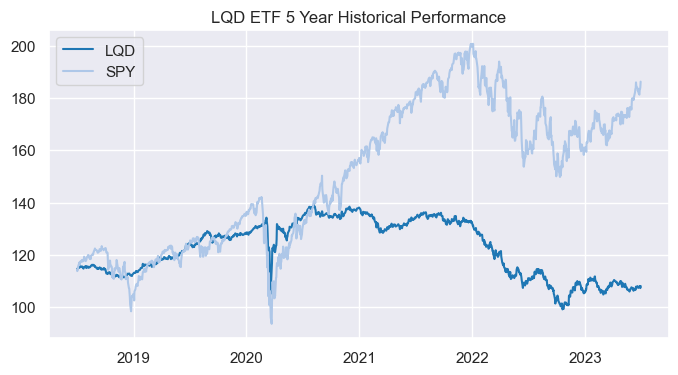

In [7]:
plt.figure(figsize = [8,4])
plt.plot(hist["Close"], label = "LQD")
plt.plot(hist_SPY["Close"] * hist["Close"][0]/hist_SPY["Close"][0], label = "SPY")
plt.title("LQD ETF 5 Year Historical Performance")
plt.legend()
plt.show()

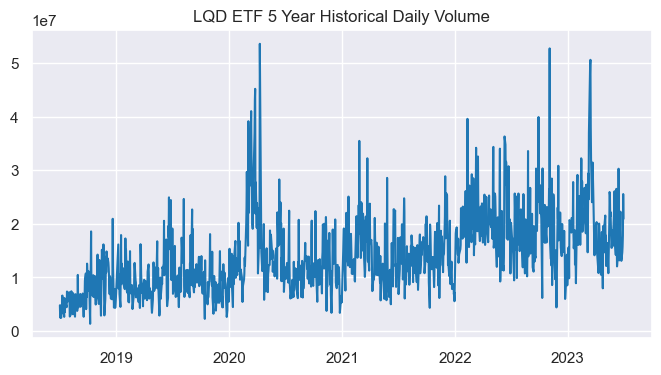

In [8]:
plt.figure(figsize = [8,4])
plt.plot(hist["Volume"])
plt.title("LQD ETF 5 Year Historical Daily Volume")
plt.show()

In [9]:
df_etfs = pd.DataFrame({"LQD": hist["Close"], "SPY": hist_SPY["Close"]})
df_etfs["LQD_return"] = df_etfs["LQD"].pct_change()
df_etfs["SPY_return"] = df_etfs["SPY"].pct_change()
df_etfs.head()

,LQD,SPY,LQD_return,SPY_return
Date,,,,
2018-07-02,114.239998,271.859985,NaN,NaN
2018-07-03,114.660004,270.899994,0.003677,-0.003531
2018-07-05,115.019997,273.109985,0.003140,0.008158
2018-07-06,115.180000,275.420013,0.001391,0.008458
2018-07-09,115.260002,277.899994,0.000695,0.009004


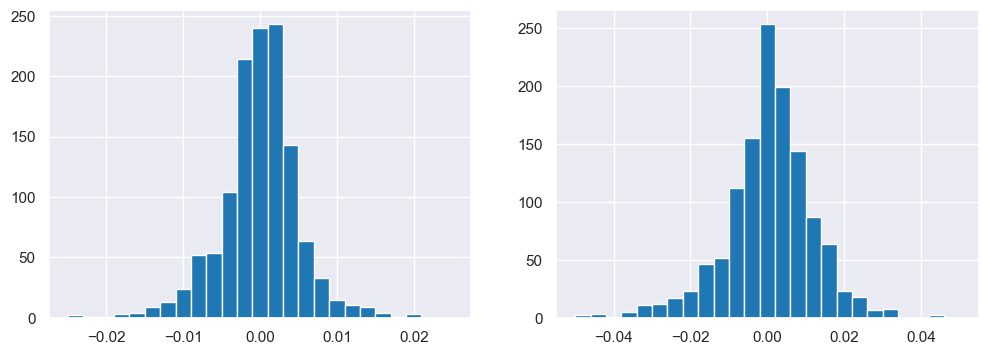

In [10]:
fig, ax = plt.subplots(1, 2, figsize = [12,4])
ax[0].hist(df_etfs["LQD_return"], bins = 25, range = [-.025, .025])
ax[1].hist(df_etfs["SPY_return"], bins = 25, range = [-.05, .05])
plt.show()

In [11]:
df_etfs[["LQD_return", "SPY_return"]].corr()

,LQD_return,SPY_return
LQD_return,1.000000,0.317936
SPY_return,0.317936,1.000000


In [12]:
df_etfs.to_pickle("df_etfs.pkl")

## LQD Holdings

In [159]:
df_LQD_09262023 = pd.read_csv('LQD_holdings-2.csv')
df_LQD_09262023.columns = ['Name', 'Sector', 'Asset_Class', 'Market_Value', 'Weight',
       'Notional', 'Par', 'CUSIP', 'ISIN', 'SEDOL', 'Price',
       'Location', 'Exchange', 'Currency', 'Duration', 'YTM', 'FX_Rate',
       'Maturity', 'Coupon', 'Mod_Duration', 'YTC',
       'YTW', 'Real_Duration', 'Real_YTM',
       'Market_Currency', 'Accrual_Date', 'Effective_Date']

In [160]:
df_LQD_09262023 = df_LQD_09262023.sort_values("Weight", ascending = False)
df_LQD_09262023 = df_LQD_09262023.drop(["SEDOL", "Exchange", "Currency", "Market_Currency"], axis = 1)
df_LQD_09262023 = df_LQD_09262023.reset_index().drop(["index"], axis = 1)
df_LQD_09262023.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,...,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.00,...,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,...,1.0,19-May-53,5.30,14.13,-,5.72,14.13,5.72,19-May-23,19-May-23
2,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,...,1.0,1-Feb-46,4.90,12.78,-,5.80,12.78,5.80,1-Feb-19,13-May-19
3,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,...,1.0,1-Oct-37,6.75,8.74,-,6.55,8.74,6.55,3-Oct-07,3-Oct-07
4,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,...,1.0,25-Mar-48,5.05,12.92,-,6.38,12.92,6.38,9-Mar-18,9-Mar-18


In [161]:
df_LQD_09262023.groupby("Asset_Class").agg(["count", "sum"])[["Weight"]].sort_values(('Weight',   'sum'), ascending = False)

Weight       
              count    sum
Asset_Class               
Fixed Income   2685  99.84
Money Market      1   0.39
Cash              1  -0.08

In [162]:
df_LQD_09262023_notbond = pd.concat([df_LQD_09262023.iloc[0], 
                                     df_LQD_09262023.iloc[2686]], axis = 1).T.reset_index().drop(["index"], axis = 1)
df_LQD_09262023_notbond

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,...,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.0,...,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,USD CASH,Cash and/or Derivatives,Cash,"-24,555,802.99",-0.08,"-24,555,802.99","-24,555,803.00",-,-,100.0,...,1.0,-,0.0,0.0,-,5.34,0.0,5.34,-,1-Jan-89


In [163]:
df_LQD_09262023_bond = df_LQD_09262023.iloc[1:2686].reset_index().drop(["index"], axis = 1)
df_LQD_09262023_bond["Maturity"] = df_LQD_09262023_bond["Maturity"].apply(pd.Timestamp)
df_LQD_09262023_bond["Accrual_Date"] = df_LQD_09262023_bond["Accrual_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond["Effective_Date"] = df_LQD_09262023_bond["Effective_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond = df_LQD_09262023_bond.replace("Brokerage/Asset Managers/Exchanges", "Asset Managers")
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,...,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,...,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,...,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,...,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,...,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,...,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21


In [164]:
def add_100_years(date):
    if date.year >= 1900 and date.year <= 2022:
        return date + pd.DateOffset(years=100)
    return date

In [165]:
df_LQD_09262023_bond["Maturity"] = df_LQD_09262023_bond["Maturity"].apply(add_100_years)
df_LQD_09262023_bond["TTM"] = df_LQD_09262023_bond["Maturity"].apply(lambda x: 
                                                                     round((x - pd.Timestamp(dt.datetime.today().date())).days/365, 4))
df_LQD_09262023_bond["TFI"] = df_LQD_09262023_bond["Effective_Date"].apply(lambda x: 
                                                                     round((pd.Timestamp(dt.datetime.today().date()) - x).days/365, 4))
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,...,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,...,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.5534,0.4685
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,...,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.2548,4.4877
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,...,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.9123,16.1041
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,...,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.4000,5.6658
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,...,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.4438,2.4630


In [166]:
df_LQD_09262023_bond.groupby("Sector")[["Weight"]].agg(["count", "sum"]).sort_values(('Weight',   'sum'), ascending = False).T

Sector        Banking  Consumer Non-Cyclical  Communications  Technology  \
Weight count    509.0                 471.00          270.00       314.0   
       sum       24.4                  17.69           12.27        11.3   

Sector        Energy  Consumer Cyclical  Capital Goods  Insurance  Electric  \
Weight count  240.00             212.00         137.00     135.00    130.00   
       sum      7.94               6.91           4.42       4.18      3.33   

Sector        Basic Industry  Transportation  Asset Managers  Reits  \
Weight count           68.00           67.00           44.00  43.00   
       sum              2.06            1.78            1.33   1.02   

Sector        Finance Companies  Natural Gas  Owned No Guarantee  \
Weight count              17.00        15.00                8.00   
       sum                 0.59         0.34                0.11   

Sector        Utility Other  Industrial Other  
Weight count           3.00              2.00  
       sum             0.09              0.08

In [167]:
df_LQD_09262023_bond["TTM_Range"] = pd.cut(df_LQD_09262023_bond["TTM"], 
                                           [0, 3, 5, 7, 10, 15, 20, 100],
                                          labels = ["2-3 Years", "3-5 Years", "5-7 Years", "7-10 Years", 
                                                    "10-15 Years", "15-20 Years", "20+ Years"])
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,...,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM,TFI,TTM_Range
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,...,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.5534,0.4685,20+ Years
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,...,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.2548,4.4877,20+ Years
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,...,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.9123,16.1041,10-15 Years
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,...,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.4000,5.6658,20+ Years
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,...,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.4438,2.4630,5-7 Years


In [168]:
bond_bloomberg = pd.read_csv("LQD_bloomberg.csv")
bond_bloomberg["Cusip"] = bond_bloomberg["Cusip"].apply(lambda x: x[:-5])
bond_bloomberg = bond_bloomberg.rename(columns = {"Sector" : "Sector_bad"}).dropna(how = "all", axis = 1)
bond_bloomberg.sort_values("Liquidity Score", ascending = False).head()

,Cusip,Amount Issued,Sector_bad,Moody Rating,S&P Rating,Fitch Rating,Liquidity Score
18,126650CX6,9000000000,"Consumer, Non-cyclical",Baa2,BBB,NaN,81.0
28,716973AC6,4000000000,"Consumer, Non-cyclical",A1,A+,Au,80.0
42,38141GYM0,4250000000,Financial,A2,BBB+,A,80.0
4,87264ABF1,7000000000,Communications,Baa2,BBB,BBB+,80.0
16,06051GHD4,5989208000,Financial,A1,A-,AA-,80.0


In [169]:
df_characteristics = pd.concat([df_LQD_09262023_bond, bond_bloomberg], axis = 1)
df_characteristics = df_characteristics[["Name", "CUSIP", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                                         "Amount Issued", "Sector", "Location", "Accrual_Date", "Effective_Date",
                                         "Moody Rating", "S&P Rating", "Fitch Rating", "Liquidity Score", "TTM_Range", "TFI"]]
df_characteristics.columns = ["Name", "Cusip", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                              "Amount_Issued", "Industry", "Location", "Accrual_Date", "Effective_Date",
                              "Moody_Rating", "S&P_Rating", "Fitch_Rating", "Liquidity_Score", "TTM_Range", "TFI"]
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.5534,5.30,0.30,"89,007,554.69","92,844,000.00",6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,Au,67.0,20+ Years,0.4685
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.2548,4.90,0.28,"83,824,691.11","93,649,000.00",9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,WD,75.0,20+ Years,4.4877
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,"75,296,859.48","71,627,000.00",5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,"63,965,861.13","76,499,000.00",8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,NaN,73.0,20+ Years,5.6658
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4438,3.88,0.21,"62,092,244.65","68,427,000.00",7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.4630


In [170]:
def clean_rating(x):
    try:
        if ("*" in x):
            return x[:-3]
        if ("u" in x):
            return x[:-1]
        elif (x == "WR") | (x == "WD") | (x == ""):
            return "None"
        else:
            return x
    except:
        return "None"

In [171]:
df_characteristics["Moody_Rating"] = df_characteristics["Moody_Rating"].apply(clean_rating)
df_characteristics["S&P_Rating"] = df_characteristics["S&P_Rating"].apply(clean_rating)
df_characteristics["Fitch_Rating"] = df_characteristics["Fitch_Rating"].apply(clean_rating)
df_characteristics = df_characteristics.replace("Ba", "Ba1")
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.5534,5.30,0.30,"89,007,554.69","92,844,000.00",6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.4685
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.2548,4.90,0.28,"83,824,691.11","93,649,000.00",9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.4877
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,"75,296,859.48","71,627,000.00",5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,"63,965,861.13","76,499,000.00",8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.6658
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4438,3.88,0.21,"62,092,244.65","68,427,000.00",7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.4630


In [172]:
df_characteristics["Notional"] = df_characteristics["Notional"].apply(lambda x: float(x.replace(",", "")))
df_characteristics["Par"] = df_characteristics["Par"].apply(lambda x: float(x.replace(",", "")))
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.5534,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,United States,2023-05-19,2023-05-19,A1,A+,A,67.0,20+ Years,0.4685
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.2548,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,Belgium,2019-02-01,2019-05-13,A3,A-,None,75.0,20+ Years,4.4877
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,United States,2018-03-09,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.6658
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4438,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.4630


In [173]:
def clean_company(x):
    
    ignore = ["Mtn", "Inc", "In", "(Fx-Frn)", "Co", "Sa", "Corp",  "(The)", "Plc", "Dac", "Ltd", "Llc", "C"
              "(Fx-Fx)", "Na", "Pty", "L", "(Usa)", "Lp", "Fin", "Caym", "144A", "/", "Aerca", "Fxd-Frn", 
              "(Fxd-Frn)", "Corp/The", "O", "Limited", "Cor", "Corpo", "Compan", "Ll", "Ua", "Ag", "Emc",
              "Holdin", "Nv", "Inc.", "Lux", "Bv", "Iii", "Sca", "(Min", "Pte", "Pte.", "Ire", "Sau", 
              "Internationa", "Fina", "Credit", "Op"]

    substrings = [ele for ele in ignore if (ele in x)]

    l = [i for i in x.split(" ") if (i not in substrings)]

    x = " ".join(l)    
    return x

In [174]:
df_characteristics["Company"] = df_characteristics["Name"].apply(lambda x: clean_company(x.title()))
df_characteristics["Company"] = df_characteristics["Company"].replace(["Anheuser-Busch Inbev Finance", "Anheuser-Busch Inbev Worldwide", "Anheuser-Busch Companies"], "Anheuser-Busch")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ascension Health Alliance"], "Ascension Health")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Astrazeneca Finance"], "Astrazeneca")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Barrick North America Finance", "Barrick Pd Australia Finance"], "Barrick Finance")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Berkshire Hathaway Energy", "Berkshire Hathaway Finance"], "Berkshire Hathaway")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Bp Capital Markets America"], "Bp Capital Markets")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Broadcom Corp/Broadcom Cayman", "Broadcom Corporation/Broadcom"], "Broadcom")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Cheniere Energy Partners"], "Cheniere Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Chevron Usa"], "Chevron")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Citibank", "Citigroup"], "Citi")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Citizens Financial Group"], "Citizens Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Deere &", "John Deere Capital"], "Deere & Company")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Credit Suisse (New York Branch)"], "Credit Suisse")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Deutsche Bank (New York Branch)", "Deutsche Bank (Ny Branch) Fxd-F"], "Deutsche Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Devon Energy Corporation"], "Devon Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Dh Europe Finance Ii Sarl"], "Danaher Corporation")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Discover Bank"], "Discover Financial Services")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Duke Energy Florida", "Duke Energy Carolinas"], "Duke Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Energy Transfer Operating", "Energy Transfer Partners"], "Energy Transfer")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Fidelity National Information Serv"], "Fidelity National Information Services")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ge Capital International Funding C", "Ge Healthcare Technologies"], "General Electric")
df_characteristics["Company"] = df_characteristics["Company"].replace(["General Motors Financial"], "General Motors")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Goldman Sachs Capital I", "Goldman Sachs Group Inc/The", "Goldman Sachs Group", "Goldman Sachs Group Inc/The Frn","Goldman Sachs Group Inc/The Fx-Frn"], "Goldman Sachs")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Huntington Bancshares", "Huntington National Bank"], "Huntington Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Jefferies Financial Group"], "Jefferies Group")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Jpmorgan Chase &", "Jpmorgan Chase & Fxd"], "Jpmorgan Chase")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Kaiser Foundation Hospitals"], "Kaiser Permanente")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Kinder Morgan Energy Partners"], "Kinder Morgan")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Keybank National Association"], "Keycorp")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Lockheed Martin Corporation"], "Lockheed Martin")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Massachusetts Institute Of Technol"], "Massachusetts Institute Of Technology")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Merck &"], "Merck")
df_characteristics["Company"] = df_characteristics["Company"].replace(["National Australia Bank (New Y"], "National Australia Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Nxp Nxp Funding Nxp Usa"], "Nxp")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pacific Gas And Electric Company"], "Pacific Gas And Electric")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pfizer Investment Enterprises"], "Pfizer")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pnc Financial Services Group ("], "Pnc Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Rio Tinto Alcan", "Rio Tinto Finance"], "Rio Tinto")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Santander Holdings Usa", "Santander Uk Group Holdings", "Banco Santander", "Banco Santander (Fx-Fx)"], "Santander")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Southern California Edison Company"], "Southern California Edison")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Targa Resources Partners"], "Targa Resources")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Telefonica Europe"], "Telefonica Emisiones")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Time Warner Entertainment Cmpny"], "Time Warner Cable")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Toronto-Dominion Bank/The"], "Toronto-Dominion Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Truist Financial"], "Truist Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Ubs (London Branch)", "Ubs Group"], "Ubs")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Virginia Elec & Power"], "Virginia Electric And Power")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Wells Fargo &", "Wells Fargo & Company", "Wells Fargo & Company Fx-Frn", "Wells Fargo & Company(Fx-Frn)", "Wells Fargo Bank"], "Wells Fargo")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Western Midstream Operating"], "Western Midstream")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Shell International Finance"], "Royal Dutch Shell")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Telefonica Emisiones"], "Telefonica")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Gsk Consumer Healthcare Capital Us", "Glaxosmithkline Capital"], "Glaxosmithkline")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Unilever Capital"], "Unilever")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Unilever Capital"], "Unilever")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Bat Capital", "Bat International Finance"], "British American Tobacco")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Sunoco Logistics Partners Operatio"], "Sunoco")
df_characteristics["Company"] = df_characteristics["Company"].replace(["American Honda Finance Corporation"], "Honda Motor")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Manufacturers And Traders Trust", "M&T Bank Corporation"], "M&T Bank")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Twdc Enterprises 18"], "Walt Disney")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Pacific Gas And Electric", "Pacific Gas & Electric Utilities"], "PG&E")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Caterpillar Financial Services"], "Caterpillar")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Exelon Corporation", "Exelon Generation", "Commonwealth Edison Company"], "Exelon")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Cheniere Corpus Christi Holdings", "Cheniere Energy"], "Cheniere")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Northern States Power Company", "Public Service Company Of Colorado"], "Xcel Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Medtronic Global Holdings"], "Medtronic")
df_characteristics["Company"] = df_characteristics["Company"].replace(["San Diego Gas & Electric"], "Sempra")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Virginia Electric And Power"], "Dominion Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Connecticut Light And Power"], "Eversource Energy")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Chubb Ina Holdings"], "Chubb")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Mylan"], "Viatris")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Midamerican Energy Company", "Pacificorp"], "Berkshire Hathaway")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Aetna"], "Cvs Health")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Time Warner Cable", "Charter Communications Operating"], "Charter Communications")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Suisse (New York Branch)"], "Credit Suisse")
df_characteristics["Company"] = df_characteristics["Company"].replace(["Mercedes-Benz Finance North Americ"], "Mercedes-Benz")




In [175]:
df_characteristics[df_characteristics["Company"].str.contains("Goldman")]

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041,Goldman Sachs
38,GOLDMAN SACHS GROUP INC/THE FRN,38141GYM0,2027-10-21,3.9589,1.95,0.12,35725536.41,40109000.0,5923231000,Banking,United States,2021-10-21,2021-10-21,Baa2,BBB,BBB+,53.0,3-5 Years,2.0438,Goldman Sachs
50,GOLDMAN SACHS GROUP INC/THE,38141GWZ3,2029-05-01,5.4877,4.22,0.11,31787177.94,33674000.0,4988336000,Banking,United States,2018-04-23,2018-04-23,Baa3,BBB-,BBB-,72.0,5-7 Years,5.5425,Goldman Sachs
51,GOLDMAN SACHS GROUP INC/THE,38141GZM9,2033-02-24,9.3096,3.10,0.11,31939173.30,39706000.0,4250000000,Banking,United States,2022-01-24,2022-01-24,A1,BBB+,A+,61.0,7-10 Years,1.7836,Goldman Sachs
67,GOLDMAN SACHS GROUP INC (FXD-FRN),38141GZR8,2028-03-15,4.3589,3.62,0.10,29298222.98,31677000.0,2978841000,Banking,United States,2022-03-15,2022-03-15,A1,AA-,None,63.0,3-5 Years,1.6466,Goldman Sachs
73,GOLDMAN SACHS GROUP INC/THE,38141GYB4,2032-04-22,8.4658,2.62,0.10,29129920.62,36581000.0,3000000000,Banking,United States,2021-04-22,2021-04-22,Baa2,BBB-,BBB-,54.0,7-10 Years,2.5425,Goldman Sachs
87,GOLDMAN SACHS GROUP INC/THE,38141GGM0,2041-02-01,17.2521,6.25,0.10,30927724.40,30380000.0,3250000000,Banking,United States,2011-01-28,2011-01-28,A2,BBB+,A,72.0,15-20 Years,12.7808,Goldman Sachs
97,GOLDMAN SACHS GROUP INC/THE,38141GYJ7,2032-07-21,8.7123,2.38,0.10,29888985.42,38833000.0,3541381000,Banking,United States,2021-07-21,2021-07-21,Baa1,BBB+,BBB,25.0,7-10 Years,2.2959,Goldman Sachs
99,GOLDMAN SACHS GROUP INC/THE FX-FRN,38141GZK3,2028-02-24,4.3041,2.64,0.09,25989206.38,28996000.0,3000000000,Banking,United States,2022-01-24,2022-01-24,A1,A-,A+,63.0,3-5 Years,1.7836,Goldman Sachs
157,GOLDMAN SACHS GROUP INC/THE,38141GWV2,2029-04-23,5.4658,3.81,0.08,22523625.36,24287000.0,2750000000,Banking,United States,2018-01-23,2018-01-23,A2,BBB+,A,70.0,5-7 Years,5.7890,Goldman Sachs


## Stock Tickers

In [176]:
df_companies = pd.DataFrame({"Company": df_characteristics["Company"].unique()})
df_companies.head()

,Company
0,Pfizer
1,Anheuser-Busch
2,Goldman Sachs
3,Cvs Health
4,T-Mobile Usa


In [177]:
df_companies["Ticker"] = ["PFE", "BUD", "GS", "CVS", "TMUS", "DTEGY", "BA", None, "BTGOF", "T", "WFC", "ABBV", "BAC", "ORAN", 
                          "C", "JPM", "MSFT", "GSK", "AZN", "AMGN", "MS", "VZ", None, "AAPL", "CMCSA", "RTX", "CI", "AMZN", 
                          "SHEL", "ALLY", "HD", "BMY", "ORCL", "LYG", "V", "AER", "TEF", "HSBC", "CNC", "META", "IBM", "CHTR",
                          None, "SMFG", "FI", "CSCO", "MBGYY", "PCG", "WMT", "LUV", "ABT", "MO", "BCS", "TD", "KHC", "VOD", 
                          "AVGO", "RABO.AS", "HCA", "XOM", "BRK-B", "UNH", "GILD", "PM", "VLO", "BP","SAN", "MA", "TRP", "ING", 
                          "GE", "DB", "MFG", "DIS", "DD", "CNQ", "UPS", "NWG", "ENB", "TFC", "DELL", "PNC", "FOXA", "OXY", "BTI", 
                          "BHP", "REYN", "PEP", "KVUE", "USB", "SHW", "LNG", "INTC", "DE", "MUFG", "UBS", "NEE", "ET", "AMT", "GPN","HLN",
                          "TAK", "RCI", "GM", "UL", "PSX", "COP", "BDX", "CAT", "MPC", "CE", "PYPL", "GOOGL", "WMB", "RY", 
                          "NOC", "WEBNF", "CS", "CARR", "KMI", "CRM", "EQH", "BKNG", "PARA", "SU", "EQIX", "BKR", "LOW", "EQT", "JNJ", 
                          "FCX", "TM", "KO", "TRV", "JEF", "ICE", "WES", "MRK", "D", "SO", "DOW", "NKE", "NMR", "WAB", "QCOM", 
                          "MMC", "TMO", "TTE", "NDAQ", "OTIS", "AON", "CCI", "LHX", "PRU", "AXP", "OKE", "NVDA", "HPQ", None, "MT", 
                          "TRGP", None, "GIS", "TAP", "LRCX", "HAL", "LVS", "MCD", "FITB", "KDP", "PWR", "COST", "DVN", "MU", "TGT", 
                          "SRE", "BAX", "FANG", "VICI", "MDT", "LMT", "BXP", "NI", "RELX", "VTRS", "MPLX", "PLD", "MET", "RRX", "ELV", 
                          "JBSAY", "NEM", "HON", "KLAC", "FPL", "RIO", "GOLD", "DUK", "AWK", "DG", "WM", "UNP", "ATH-PA", "EPD", "KGHI", 
                          "HMC", "WDAY", "SPGI", "PH", "NFLX", "LLY", "EMR", "BAM", "GPJA", "GD", "ARE", "REGN", "NSC", 
                          "EIX", "HES", "BNS", "ADBE", "PG", "VMW", "EXPE", "TXN", "TSN", "HPE", "SUN", "SCHW", "SYY", "BIIB", 
                          "AES", "CAG", "CB", "CVX", "NXPI", "ED", "FDX", "EBAY", "ES", "CP", "MRO", "NVS", "CSX", "ETN", "CRBG", "LDOS", 
                          "ITW", "SBUX", "CDW", "SPG", "HUM", "PAA", "ADM", "TDY", "DLR", "MAR", "INTU", "RPRX", "MTB", "SLB", "DISCA", 
                          "TT", "FIS", "MFC", "EXC", "CAH", "CF", "GLP", None, "ADI", "PEAK", "SWK", "ADP", "COF", "DFS", "DLTR", "MMM", 
                          "EQNR", "O", "DEO", "CBRE", "EFX", "MSI", "WTW", "STZ", "ZTS", "RSG", "WY", "COR", "BR", "ADSK", "ROP", "CME",
                          "ENBL", "CPB", "EMRAF", "BG", "AMAT", "BCE", "NTR", "BMO", "WRK", "APH", "AGR", "QRVO", "GLW", "NTRS", "AZO", 
                          "KEY", "AIG", "ARCC", "APD", "BSX", "LYB", "CLR", "CNP", None, None, "MDLZ", "WELL", "RJF", "OBDC", "KMB",
                          "NABZY", "MKC", "EOG", "CEG", "APTV", "AMCR", "DGX", "BX", None, "DHR", "CM", "AMP", "CMI", "HRL", None, "EG", 
                          "PXD", None, "XEL", "HR", "HAS", "HBAN", "SYK", "MRVL", "BRX", "CVE", "WCN", "VMC", "UHS", "FSK", "MLM", "ZBH", 
                          "OVV", "DTE", "CNI", "VFC", "RVTY", "PPL", "WBA", "ATVI", "ORLY", "PGR", "ECL", "KR", "MMP", "CFG", "IFF", None, 
                          "ACGL", "AEE", "TJX", "BK", "LH", "STT", "AL", "BHF", "BBAR", "SYF", "BWA", "EMN", "ALL", "EVRG", "NGG", "FRFHF", 
                          "TU", "AEP", "ATO", "ETR", "PRSC", "PEG", "HIG", "OMC"]

In [178]:
df_companies[df_companies["Ticker"] == "DT"] #REYN

,Company,Ticker


In [179]:
df_companies[df_companies["Ticker"].isna()]

,Company,Ticker
7,Warnermedia Holdings,None
22,Sprint Capital Corporation,None
42,Wyeth,None
158,Burlington Northern Santa Fe,None
161,Sabine Pass Liquefaction,None
270,Massachusetts Institute Of Technology,None
318,Commonspirit Health,None
319,Lyb International Finance,None
333,Ventas Realty,None
339,Erp Operating,None


In [180]:
df_companies["Sector"] = ["Health Care", "Consumer Staples", "Financials", "Health Care", "Communications", "Communications", "Industrials","Communications", 
     "Communications", "Communications", "Financials", "Health Care", "Financials", "Communications", "Financials", "Financials",  
     "Technology", "Health Care", "Health Care", "Health Care", "Financials", "Communications", "Communications", "Technology",
     "Consumer Discretionary", "Industrials", "Health Care", "Consumer Discretionary", "Energy", "Financials", "Consumer Discretionary",  
     "Health Care", "Technology", "Financials", "Technology", "Financials", "Communications", "Financials", "Health Care", 
     "Technology", "Technology", "Communications", "Health Care", "Financials", "Technology", "Technology", "Consumer Discretionary",
     "Utilities", "Consumer Discretionary", "Industrials", "Health Care", "Consumer Staples", "Financials", "Financials", "Consumer Staples",
     "Communications", "Technology", "Financials", "Health Care", "Energy", "Financials", "Health Care", "Health Care", "Consumer Staples", 
     "Energy", "Energy", "Financials", "Technology", "Energy", "Financials", "Industrials",  "Financials", "Financials", "Consumer Discretionary",
     "Materials", "Energy", "Industrials", "Financials", "Energy", "Financials", "Technology", "Financials",  "Communications",  
     "Energy", "Consumer Staples", "Materials", "Consumer Staples", "Consumer Staples", "Health Care", "Financials", "Materials", "Energy", 
     "Technology", "Industrials", "Financials", "Financials", "Utilities", "Energy", "Real Estate", "Technology", "Financials", 
     "Health Care", "Communications", "Consumer Discretionary", "Consumer Staples", "Energy", "Energy", "Health Care", "Industrials",  
     "Energy", "Materials", "Technology", "Communications", "Energy", "Financials", "Industrials", "Financials", "Financials", "Industrials",
     "Energy", "Technology", "Financials", "Consumer Discretionary", "Consumer Discretionary", "Energy", "Real Estate", "Energy",
     "Consumer Discretionary", "Energy", "Health Care", "Materials", "Consumer Discretionary", "Consumer Staples", "Financials", "Financials",
     "Financials", "Energy", "Health Care", "Utilities", "Utilities", "Materials", "Consumer Discretionary", "Financials", "Industrials",
     "Technology", "Financials", "Health Care", "Energy", "Financials", "Industrials", "Financials", "Real Estate", "Industrials", "Financials",
     "Financials", "Energy", "Technology", "Technology", "Industrials", "Materials", "Energy", "Energy", "Consumer Staples",
     "Consumer Staples", "Technology", "Energy", "Consumer Discretionary", "Consumer Discretionary", "Financials", "Consumer Staples",  
     "Industrials", "Consumer Discretionary", "Energy", "Technology", "Consumer Discretionary", "Utilities", "Health Care", "Energy",  
     "Real Estate", "Health Care", "Industrials", "Real Estate", "Utilities", "Consumer Discretionary", "Health Care", "Energy", "Real Estate",
     "Financials", "Consumer Discretionary", "Health Care", "Consumer Staples", "Materials", "Industrials", "Technology", "Utilities", "Materials", "Materials",  
     "Utilities", "Utilities", "Consumer Discretionary", "Industrials", "Industrials", "Financials", "Energy", "Health Care", "Consumer Discretionary", 
     "Technology", "Financials", "Industrials", "Communications", "Health Care", "Industrials", "Financials", "Utilities", "Industrials",
     "Real Estate", "Health Care", "Industrials", "Utilities", "Energy", "Financials", "Technology", "Consumer Staples", "Technology",
     "Consumer Discretionary", "Technology", "Consumer Staples", "Technology", "Energy", "Financials", "Consumer Staples", "Health Care",
     "Utilities", "Consumer Staples", "Financials", "Energy", "Technology", "Utilities", "Industrials", "Consumer Discretionary", "Utilities",
     "Industrials", "Energy", "Health Care", "Industrials", "Industrials", "Financials", "Technology", "Industrials", "Consumer Discretionary",
     "Technology", "Real Estate", "Health Care", "Energy", "Consumer Staples", "Technology", "Real Estate", "Consumer Discretionary",
     "Technology", "Health Care", "Financials", "Energy", "Communications", "Industrials", "Technology", "Financials",
     "Utilities", "Health Care", "Materials", "Real Estate", "Technology", "Technology", "Real Estate", "Industrials", "Technology", "Financials",
     "Financials", "Consumer Discretionary", "Industrials", "Energy", "Real Estate", "Consumer Staples", "Real Estate", "Technology", "Technology",
     "Financials", "Consumer Staples", "Health Care",  "Industrials",  "Real Estate",  "Health Care", "Technology",  "Technology", "Industrials",
     "Financials", "Energy", "Consumer Staples", "Utilities", "Consumer Staples", "Technology", "Communications", "Materials", "Financials", 
     "Real Estate", "Technology", "Utilities", "Technology", "Technology", "Financials", "Consumer Discretionary", "Financials", "Financials",
     "Financials", "Materials", "Health Care", "Materials", "Energy", "Utilities", "Health Care", "Technology", "Consumer Staples",
     "Real Estate", "Financials", "Financials", "Consumer Staples", "Financials", "Consumer Staples", "Energy", "Energy", "Consumer Discretionary", 
     "Materials", "Health Care", "Financials", "Real Estate", "Health Care", "Financials", "Financials", "Industrials",  "Consumer Staples", 
     "Technology", "Financials", "Energy", "Health Care", "Utilities", "Real Estate", "Consumer Discretionary", "Financials", "Health Care",
     "Technology", "Real Estate", "Energy", "Industrials", "Materials", "Health Care", "Financials", "Materials", "Health Care", 
     "Energy", "Utilities", "Industrials", "Consumer Discretionary", "Health Care", "Utilities", "Consumer Staples", "Communications",
     "Consumer Discretionary", "Financials", "Materials", "Consumer Staples", "Energy", "Financials", "Materials", "Health Care", "Financials", 
     "Utilities", "Consumer Discretionary", "Financials", "Health Care", "Financials", "Industrials", "Financials", "Financials", "Financials", 
     "Consumer Discretionary", "Materials", "Financials", "Utilities", "Utilities", "Financials", "Communications", "Utilities", "Utilities", 
     "Utilities", "Health Care", "Utilities", "Financials", "Communications"]

In [181]:
df_companies.head()

,Company,Ticker,Sector
0,Pfizer,PFE,Health Care
1,Anheuser-Busch,BUD,Consumer Staples
2,Goldman Sachs,GS,Financials
3,Cvs Health,CVS,Health Care
4,T-Mobile Usa,TMUS,Communications


In [182]:
df_characteristics["Ticker"] = df_characteristics["Company"].apply(lambda x: df_companies[df_companies["Company"] == x]["Ticker"].values[0])
df_characteristics["Sector"] = df_characteristics["Company"].apply(lambda x: df_companies[df_companies["Company"] == x]["Sector"].values[0])
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,...,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.5534,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,...,2023-05-19,A1,A+,A,67.0,20+ Years,0.4685,Pfizer,PFE,Health Care
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.2548,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,...,2019-05-13,A3,A-,None,75.0,20+ Years,4.4877,Anheuser-Busch,BUD,Consumer Staples
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,...,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041,Goldman Sachs,GS,Financials
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,...,2018-03-09,Baa2,BBB,None,73.0,20+ Years,5.6658,Cvs Health,CVS,Health Care
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4438,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,...,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years,2.4630,T-Mobile Usa,TMUS,Communications


In [183]:
sectors = pd.DataFrame(df_characteristics["Sector"].unique()).rename(columns = {0: "Sector"})
sectors.index = ["XLF", "XLV", "XLK", "XLY", "XLE", "XLI", "XLP", "XLC", "XLU", "XLRE", "XLB"]
sectors

,Sector
XLF,Health Care
XLV,Consumer Staples
XLK,Financials
XLY,Communications
XLE,Industrials
XLI,Technology
XLP,Consumer Discretionary
XLC,Energy
XLU,Utilities
XLRE,Materials


In [184]:
sector_dict = sectors.to_dict()["Sector"]
sector_dict

{'XLF': 'Health Care',
 'XLV': 'Consumer Staples',
 'XLK': 'Financials',
 'XLY': 'Communications',
 'XLE': 'Industrials',
 'XLI': 'Technology',
 'XLP': 'Consumer Discretionary',
 'XLC': 'Energy',
 'XLU': 'Utilities',
 'XLRE': 'Materials',
 'XLB': 'Real Estate'}

In [185]:
def get_key(val, dict):
    for key, value in dict.items():
        if val == value:
            return key

In [186]:
df_characteristics["Sector Ticker"] = df_characteristics["Sector"].apply(lambda x: get_key(x, sector_dict))
df_characteristics.head()

,Name,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Industry,...,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range,TFI,Company,Ticker,Sector,Sector Ticker
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.5534,5.30,0.30,89007554.69,92844000.0,6000000000,Consumer Non-Cyclical,...,A1,A+,A,67.0,20+ Years,0.4685,Pfizer,PFE,Health Care,XLF
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.2548,4.90,0.28,83824691.11,93649000.0,9518964000,Consumer Non-Cyclical,...,A3,A-,None,75.0,20+ Years,4.4877,Anheuser-Busch,BUD,Consumer Staples,XLV
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9123,6.75,0.25,75296859.48,71627000.0,5545000000,Banking,...,Baa2,BBB,BBB+,60.0,10-15 Years,16.1041,Goldman Sachs,GS,Financials,XLK
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4000,5.05,0.22,63965861.13,76499000.0,8000000000,Consumer Non-Cyclical,...,Baa2,BBB,None,73.0,20+ Years,5.6658,Cvs Health,CVS,Health Care,XLF
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4438,3.88,0.21,62092244.65,68427000.0,7000000000,Communications,...,Baa2,BBB,BBB+,80.0,5-7 Years,2.4630,T-Mobile Usa,TMUS,Communications,XLY


In [187]:
df_characteristics.to_pickle("df_characteristics.pkl")

In [188]:
df_stocks = yf.download(list(df_companies["Ticker"].dropna()), "2018-07-01", "2023-07-01")
df_stocks.head()

[*********************100%%**********************]  385 of 385 completed


6 Failed downloads:
['CS', 'CLR', 'ENBL', 'DISCA', 'PRSC']: Exception('%ticker%: No timezone found, symbol may be delisted')
['RABO.AS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Adj Close                                               \
                          AAPL       ABBV        ABT       ACGL        ADBE   
Date                                                                          
2018-07-02 00:00:00  44.660515  72.200844  55.612396  26.629999  243.259995   
2018-07-03 00:00:00  43.882698  72.588562  55.439178  26.760000  242.009995   
2018-07-05 00:00:00  44.235809  73.263199  55.913250  26.930000  244.179993   
2018-07-06 00:00:00  44.849007  75.155251  56.669945  27.280001  248.190002   
2018-07-09 00:00:00  45.471741  75.248283  56.925213  27.889999  249.770004   

                                                                              \
                           ADI        ADM         ADP        ADSK        AEE   
Date                                                                           
2018-07-02 00:00:00  87.108963  39.269840  120.948906  131.899994  53.183750   
2018-07-03 00:00:00  85.480949  39.643177  119.872681  131.600006  53.192432   
2018-07-05 00:00:00  87.190376  40.233570  119.917534  132.800003  53.470425   
2018-07-06 00:00:00  87.913956  40.554810  120.374931  135.110001  53.887421   
2018-07-09 00:00:00  87.895851  41.041016  120.643982  134.970001  52.097832   

                     ...   Volume                                              \
                     ...       WM      WMB      WMT      WRK     WTW       WY   
Date                 ...                                                        
2018-07-02 00:00:00  ...  1270600  6812900  8125100  1337800  347900  3311900   
2018-07-03 00:00:00  ...   658100  2978900  4396200  1045900  181100  2170500   
2018-07-05 00:00:00  ...  1582300  5304900  5367500  1425200  353900  2167400   
2018-07-06 00:00:00  ...  1566400  5491200  5613700  1286900  496700  2640000   
2018-07-09 00:00:00  ...  1329500  5042500  6575400  1562000  390500  2634900   

                                                        
                         XEL      XOM     ZBH      ZTS  
Date                                                    
2018-07-02 00:00:00  2826200  9998300  792997  1759000  
2018-07-03 00:00:00  1811300  7197300  534776  1283500  
2018-07-05 00:00:00  2574300  9035700  708949  2474600  
2018-07-06 00:00:00  2193800  7637100  958209  2073600  
2018-07-09 00:00:00  4289700  7158600  595340  1836800  

[5 rows x 2310 columns]

In [189]:
first_non_null_values = {}
for column in df_close.columns:
    first_non_null_index = df_close[column].first_valid_index()
    if first_non_null_index is not None:
        first_non_null_values[column] = df_close.at[first_non_null_index, column]

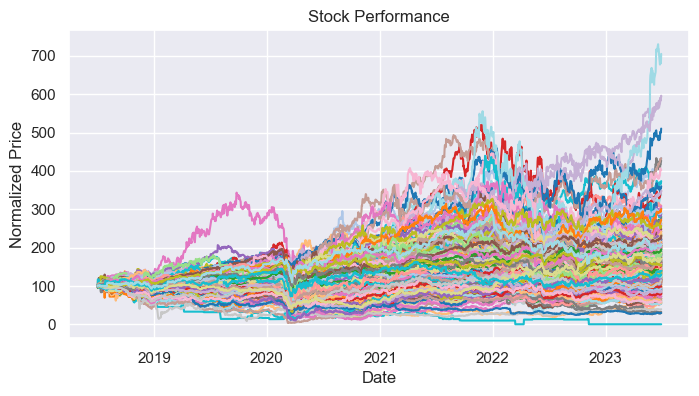

In [190]:
df_stocks_normalized = df_close.dropna(axis = 1, how = "all") / first_non_null_values.values() * 100
plt.figure(figsize = [8,4])
for i in range(len(df_stocks_normalized.columns)):
    plt.plot(df_stocks_normalized.index, df_stocks_normalized[df_stocks_normalized.columns[i]], c = c20[(i+1)%20])
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title("Stock Performance")
plt.show()

In [191]:
df_close = df_stocks["Adj Close"].dropna(axis = 1, how = "all")
df_close.to_pickle("df_close.pkl")

In [192]:
df_volume = df_stocks["Volume"].dropna(axis = 1, how = "all")
df_volume.to_pickle("df_volume.pkl")

In [193]:
df_sector_etfs = yf.download(list(sector_dict.keys()),start="2018-07-01", end="2023-07-01")["Adj Close"]
df_sector_etfs.head()

[*********************100%%**********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-07-02,51.815952,47.558674,57.704594,23.967848,65.343208,66.198059,44.529404,27.258999,44.282082,76.473465,103.793671
2018-07-03,51.726234,46.976604,58.067078,23.752565,65.133842,65.414154,44.633705,27.418262,44.409004,76.656128,103.272095
2018-07-05,52.174778,47.692257,58.005383,23.806391,65.452423,66.339729,45.250843,27.778696,44.645939,77.450829,103.784187
2018-07-06,52.434940,48.446106,58.360153,23.922997,65.679962,67.114174,45.389912,27.896046,44.992889,78.565247,104.599739
2018-07-09,52.901432,48.722839,59.231667,24.470169,66.899643,67.624199,45.216076,27.636198,43.605110,79.140717,105.851524


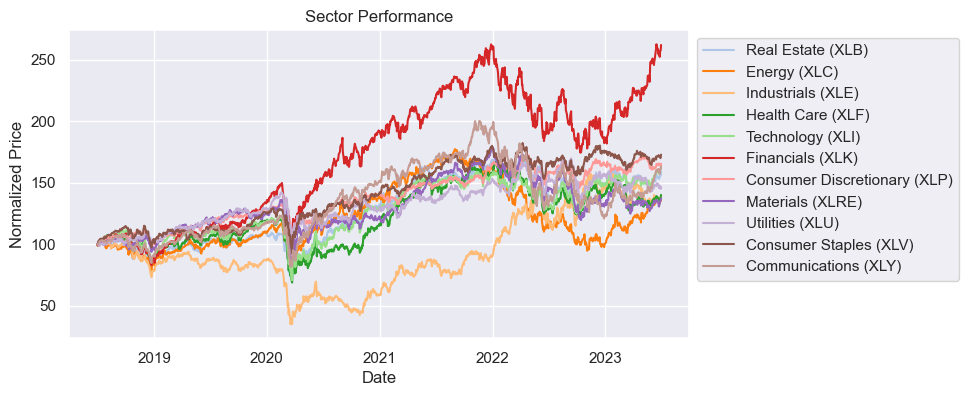

In [194]:
normalized_etf = df_sector_etfs / df_sector_etfs.iloc[0] * 100
plt.figure(figsize = [8,4])
for i in range(len(normalized_etf.columns)):
    plt.plot(normalized_etf.index, normalized_etf[normalized_etf.columns[i]], c = c20[i+1], 
             label = sector_dict[normalized_etf.columns[i]] + " (" + normalized_etf.columns[i] + ")")
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title("Sector Performance")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [195]:
df_sector_etfs.to_pickle("df_sector_etfs.pkl")

# WRDS Data

In [226]:
raw_data = pd.read_csv('gvj3rncyix0ecmwx.csv')

In [227]:
raw_data.head() 

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,wis_fl,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,days_to_sttl_ct,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_sign_cd,low_yld_pt,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,NaN,NaN,M,1MM+,E,101.616,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,NaN,NaN,M,1MM+,E,101.599,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,NaN,NaN,M,1MM+,E,101.289,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,NaN,NaN,M,1MM+,E,100.163,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,NaN,NaN,M,1MM+,E,102.015,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [30]:
column_description = pd.read_csv("data_description.csv")
column_description["Variable Name"] = column_description["Variable Name"].apply(lambda x: x.lower())
column_description

,Variable Name,Type,Description
0,bond_sym_id,string,TRACE Bond Symbol (BOND_SYM_ID)
1,company_symbol,string,Company Symbol (issuer stock ticker) (COMPANY_...
2,cusip_id,string,CUSIP (CUSIP_ID)
3,bsym,string,Bloomberg ID (BSYM)
4,trd_exctn_dt,date,Execution Date (TRD_EXCTN_DT)
5,trd_exctn_tm,double,Execution Time (TRD_EXCTN_TM)
6,rptd_pr,double,Price (RPTD_PR)
7,ascii_rptd_vol_tx,string,Quantity (ASCII_RPTD_VOL_TX)
8,frmt_cd,string,Quantity Indicator (FRMT_CD)
9,yld_pt,double,Yield (YLD_PT)


In [31]:
column_description.to_csv("column_description.csv")

In [229]:
null_columns = raw_data.columns[raw_data.isna().all()].tolist()
null_columns

['wis_fl',
 'cmsn_trd',
 'days_to_sttl_ct',
 'diss_rptg_side_cd',
 'low_yld_sign_cd',
 'lsal_yld_sign_cd']

In [230]:
raw_data = raw_data.drop(null_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [231]:
useless_columns = ["sub_prd_type", "high_yld_sign_cd", "sttl_dt", "ATS_indicator"]

In [232]:
raw_data = raw_data.drop(useless_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C


In [233]:
raw_data.shape

(18141204, 32)

In [234]:
raw_data["trd_exctn_dt"] = raw_data["trd_exctn_dt"].apply(pd.Timestamp)
raw_data["trans_dt"] = raw_data["trans_dt"].apply(pd.Timestamp)

In [235]:
raw_data["trd_exctn_tm"] = raw_data["trd_exctn_tm"].apply(lambda x: pd.Timestamp(x).time())                      

In [236]:
raw_data["trd_datetime"] = raw_data.apply(lambda x : dt.datetime.combine(x['trd_exctn_dt'],x['trd_exctn_tm']),1)

In [237]:
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [238]:
function_dictionary = {'company_symbol':["nunique", pd.Series.mode],'trd_exctn_dt':['min', 'max'], "rptd_pr": ['min', 'max', "count"]}

In [241]:
raw_data["ascii_rptd_vol_tx"] = raw_data["ascii_rptd_vol_tx"].apply(convert_to_numeric)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1000000.0,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1000000.0,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1000000.0,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1000000.0,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1000000.0,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [242]:
raw_data.to_pickle("raw_data.pkl")

In [239]:
raw_data_summary = raw_data.groupby(["cusip_id"])[["company_symbol", "trd_exctn_dt", "rptd_pr"]].agg(function_dictionary)
raw_data_summary.columns = ["num_companies", "company_symbol", "first_trade", "last_trade", "min_price", "max_price", "trades"]
raw_data_summary.head()

,num_companies,company_symbol,first_trade,last_trade,min_price,max_price,trades
cusip_id,,,,,,,
00130HCG8,1,AES,2021-08-16,2023-06-30,74.395,109.911,2064
00130HCH6,1,AES,2023-05-15,2023-06-30,97.835,101.240,645
00206RBH4,1,T,2018-07-02,2023-06-30,74.918,133.511,18534
00206RBK7,1,T,2018-07-02,2023-06-30,73.133,121.412,13332
00206RCP5,1,T,2018-07-02,2023-06-30,79.723,133.289,26275


In [240]:
def convert_to_numeric(value):
    if 'MM' in value:
        return float(value.replace('MM+', '')) * 1e6
    elif 'M' in value:
        return float(value.replace('M+', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K+', '')) * 1e3
    else:
        return float(value)

# Macroeconomic Factor Data

## Fred Data

In [145]:
fed_funds = pd.read_csv("fed_funds.csv").dropna(how = "all", axis = 1)
fed_funds["Effective Date"] = fed_funds["Effective Date"].apply(lambda x: pd.Timestamp(x))
fed_funds = fed_funds[fed_funds["Rate Type"] == "EFFR"]
fed_funds = fed_funds.sort_values("Effective Date").reset_index().drop(["index"], axis = 1)
fed_funds.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%)
0,2018-07-02,EFFR,1.91,1.89,1.90,1.92,2.06,83.0,1.75,2.0
1,2018-07-03,EFFR,1.91,1.88,1.90,1.91,2.06,88.0,1.75,2.0
2,2018-07-05,EFFR,1.91,1.88,1.90,1.91,2.06,78.0,1.75,2.0
3,2018-07-06,EFFR,1.91,1.88,1.90,1.91,2.05,80.0,1.75,2.0
4,2018-07-09,EFFR,1.91,1.89,1.91,1.91,2.06,77.0,1.75,2.0


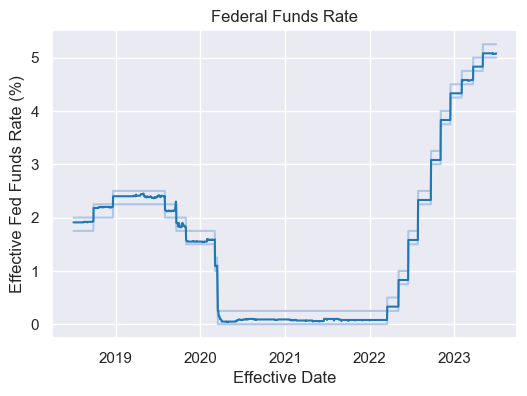

In [146]:
plt.figure(figsize = [6,4])
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate From (%)"], color = c20[1])
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate To (%)"], color = c20[1])
plt.plot(fed_funds["Effective Date"], fed_funds["Rate (%)"], color = c20[0])
plt.xlabel("Effective Date")
plt.ylabel("Effective Fed Funds Rate (%)")
plt.title("Federal Funds Rate")
plt.show()

In [147]:
yield_curve = pd.read_csv("yieldcurve.csv")
yield_curve["DATE"] = yield_curve["DATE"].apply(lambda x: pd.Timestamp(x))
yield_curve = yield_curve[yield_curve["DGS1"] != "."]
yield_curve["DGS1"] = yield_curve["DGS1"].apply(lambda x: float(x))
yield_curve["DGS2"] = yield_curve["DGS2"].apply(lambda x: float(x))
yield_curve["DGS3"] = yield_curve["DGS3"].apply(lambda x: float(x))
yield_curve["DGS5"] = yield_curve["DGS5"].apply(lambda x: float(x))
yield_curve["DGS7"] = yield_curve["DGS7"].apply(lambda x: float(x))
yield_curve["DGS10"] = yield_curve["DGS10"].apply(lambda x: float(x))
yield_curve["DGS30"] = yield_curve["DGS30"].apply(lambda x: float(x))
yield_curve.head()

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
0,2018-07-02,2.34,2.57,2.65,2.75,2.83,2.87,2.99
1,2018-07-03,2.33,2.53,2.63,2.72,2.79,2.83,2.96
3,2018-07-05,2.32,2.55,2.65,2.74,2.80,2.84,2.95
4,2018-07-06,2.34,2.53,2.64,2.71,2.78,2.82,2.94
5,2018-07-09,2.34,2.57,2.66,2.75,2.82,2.86,2.96


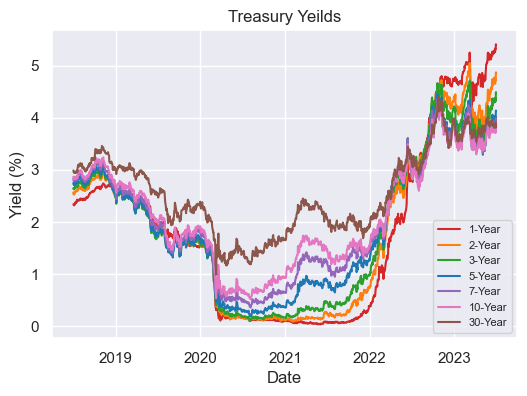

In [148]:
plt.figure(figsize = [6,4])
plt.plot(yield_curve["DATE"], yield_curve["DGS1"], label = "1-Year", color = c10[3])
plt.plot(yield_curve["DATE"], yield_curve["DGS2"], label = "2-Year", color = c10[1])
plt.plot(yield_curve["DATE"], yield_curve["DGS3"], label = "3-Year", color = c10[2])
plt.plot(yield_curve["DATE"], yield_curve["DGS5"], label = "5-Year", color = c10[0])
plt.plot(yield_curve["DATE"], yield_curve["DGS7"], label = "7-Year", color = c10[4])
plt.plot(yield_curve["DATE"], yield_curve["DGS10"], label = "10-Year", color = c10[6])
plt.plot(yield_curve["DATE"], yield_curve["DGS30"], label = "30-Year", color = c10[5])
plt.ylabel("Yield (%)")
plt.xlabel("Date")
plt.title("Treasury Yeilds")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [149]:
monthly_macro = pd.read_csv("Monthly.csv").dropna()
monthly_macro.columns = ["Date", "Unemployment", "CPI", "PCE", "IPI"]
monthly_macro["Date"] = monthly_macro["Date"].apply(lambda x: pd.Timestamp(x))
monthly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')
monthly_macro.head()

,Date,Unemployment,CPI,PCE,IPI,Trading Date
0,2018-07-01,3.8,2.519634,5.36443,3.23564,2018-07-02
1,2018-08-01,3.8,2.432878,5.41122,4.43138,2018-08-01
2,2018-09-01,3.7,2.461933,4.47557,4.35959,2018-09-03
3,2018-10-01,3.8,2.414988,4.72653,2.91253,2018-10-01
4,2018-11-01,3.8,2.476794,4.59581,2.70690,2018-11-01


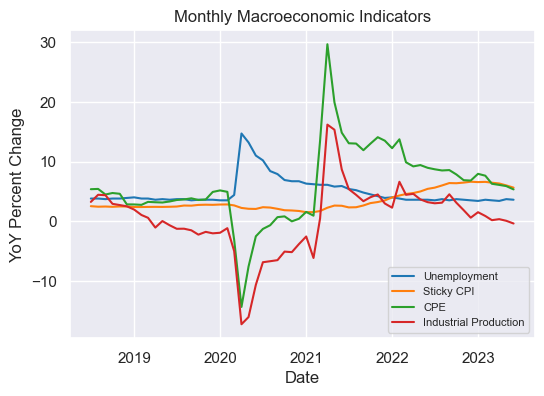

In [150]:
plt.figure(figsize = [6,4])
plt.plot(monthly_macro["Date"], monthly_macro["Unemployment"], label = "Unemployment", color = c10[0])
plt.plot(monthly_macro["Date"], monthly_macro["CPI"], label = "Sticky CPI", color = c10[1])
plt.plot(monthly_macro["Date"], monthly_macro["PCE"], label = "CPE", color = c10[2])
plt.plot(monthly_macro["Date"], monthly_macro["IPI"], label = "Industrial Production", color = c10[3])
plt.ylabel("YoY Percent Change")
plt.xlabel("Date")
plt.title("Monthly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [151]:
quarterly_macro = pd.read_csv("Quarterly.csv").dropna()
quarterly_macro.columns = ["Date", "GDP", "Real GDP per Capita"]
quarterly_macro["Date"] = quarterly_macro["Date"].apply(lambda x: pd.Timestamp(x))
quarterly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')[::3]
quarterly_macro.head()

,Date,GDP,Real GDP per Capita,Trading Date
0,2018-07-01,1.05835,0.46628,2018-07-02
1,2018-10-01,0.57281,-0.00487,2018-10-01
2,2019-01-01,0.89046,0.43818,2019-01-01
3,2019-04-01,1.32980,0.71418,2019-04-01
4,2019-07-01,1.44732,0.98506,2019-07-01


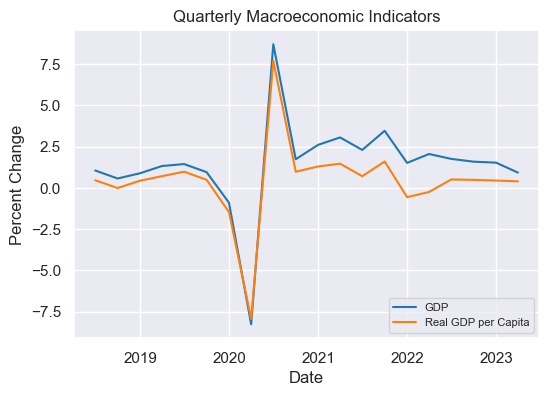

In [152]:
plt.figure(figsize = [6,4])
plt.plot(quarterly_macro["Date"], quarterly_macro["GDP"], label = "GDP", color = c10[0])
plt.plot(quarterly_macro["Date"], quarterly_macro["Real GDP per Capita"], label = "Real GDP per Capita", color = c10[1])
plt.ylabel("Percent Change")
plt.xlabel("Date")
plt.title("Quarterly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [153]:
macro_factors = pd.concat([fed_funds.set_index("Effective Date")[["Rate (%)", "Target Rate From (%)", "Target Rate To (%)"]],
                           yield_curve.set_index("DATE")], axis = 1)
macro_factors = macro_factors.ffill()
macro_factors.columns = ["EFFR", "Lower_Target", "Upper_Target", "1YRT", "2YRT", "3YRT", "5YRT", "7YRT", "10YRT", "30YRT" ]
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96


In [154]:
[i for i in df_close.index if i not in macro_factors.index]

[Timestamp('2018-10-08 00:00:00'),
 Timestamp('2018-11-12 00:00:00'),
 Timestamp('2019-10-14 00:00:00'),
 Timestamp('2019-11-11 00:00:00'),
 Timestamp('2020-10-12 00:00:00'),
 Timestamp('2020-11-11 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-11-11 00:00:00')]

In [155]:
macro_factors.loc[pd.Timestamp("2018-10-08")] = [None] * 10
macro_factors.loc[pd.Timestamp("2018-11-12")] = [None] * 10
macro_factors.loc[pd.Timestamp("2019-10-14")] = [None] * 10
macro_factors.loc[pd.Timestamp("2019-11-11")] = [None] * 10
macro_factors.loc[pd.Timestamp("2020-10-12")] = [None] * 10
macro_factors.loc[pd.Timestamp("2020-11-11")] = [None] * 10
macro_factors.loc[pd.Timestamp("2021-10-11")] = [None] * 10
macro_factors.loc[pd.Timestamp("2021-11-11")] = [None] * 10
macro_factors.loc[pd.Timestamp("2022-10-10")] = [None] * 10
macro_factors.loc[pd.Timestamp("2022-11-11")] = [None] * 10

In [156]:
[i for i in df_close.index if i not in macro_factors.index]

[]

In [157]:
macro_factors = macro_factors.sort_index()
macro_factors = macro_factors.ffill()
macro_factors = pd.concat([macro_factors, df_etfs[["SPY", "LQD"]]], axis = 1)
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,SPY,LQD
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99,271.859985,114.239998
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96,270.899994,114.660004
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95,273.109985,115.019997
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94,275.420013,115.180000
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96,277.899994,115.260002


In [158]:
macro_factors.to_pickle("macro_factors.pkl")